In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import string
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
import nltk.data
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
nltk.download('vader_lexicon')
nltk.download('punkt')
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
cd /content/drive/MyDrive/Colab Notebooks/sNLP_project/SongRecommendationChatBot/song_dataset/csv

/content/drive/MyDrive/Colab Notebooks/sNLP_project/SongRecommendationChatBot/song_dataset/csv


Bring the csv file of Taylor Swift Songs

In [4]:
df = pd.read_csv('./TaylorSwift.csv',index_col=0)
print('Number of Taylor Swift songs:',len(df))

Number of Taylor Swift songs: 479


In [5]:
df.head()

,Artist,Title,Album,Year,Date,Lyric
0,Taylor Swift,​cardigan,folklore,2020.0,2020-07-24,vintage tee brand new phone high heels on cobb...
1,Taylor Swift,​exile,folklore,2020.0,2020-07-24,justin vernon i can see you standing honey wit...
2,Taylor Swift,Lover,Lover,2019.0,2019-08-16,we could leave the christmas lights up 'til ja...
3,Taylor Swift,​the 1,folklore,2020.0,2020-07-24,i'm doing good i'm on some new shit been sayin...
4,Taylor Swift,Look What You Made Me Do,reputation,2017.0,2017-08-25,i don't like your little games don't like your...


In [6]:
df = df.astype({"Lyric": str}, errors='raise') 
df.dtypes

Artist     object
Title      object
Album      object
Year      float64
Date       object
Lyric      object
dtype: object

Data preprocessing (song lyrics cleaning)

In [7]:
#remove remix, live ....etc version of the songs
def cleaning(df):
    a=[]
    i=0
    df1=df
    title = df['Title']
    for t in df['Title']:
        r=Re=l=Li=c=m=V=ve=D=rs=0
        r=t.find('remix')
        Re=t.find('Remix')
        l=t.find('live')
        Li=t.find('Live')
        V=t.find('Version')
        ve=t.find('version')
        D=t.find('Demo ')
        D=t.find('Demo')
        rs=t.find('Reprise')
        c=t.find('COPY')
        m=t.find('Mix')
        if r != -1:
            a.append(t)
        elif Re != -1:
            a.append(t)
        elif l != -1:
            a.append(t)
        elif Li != -1:
            a.append(t)
        elif V != -1:
            a.append(t)
        elif ve != -1:
            a.append(t)
        elif D != -1:
            a.append(t)
        elif rs != -1:
            a.append(t)
        elif c != -1:
            a.append(t)
        elif m != -1:
            a.append(t)
    
    for t1 in df['Title']:
        for t2 in a:
            if t1 == t2:
                df1=df1.drop(i)
        i=i+1
    
    df1.dropna(subset = ["Title"], inplace=True)
    df1.dropna(subset = ["Lyric"], inplace=True)
    df1.drop_duplicates(subset ="Title",keep = False, inplace = True)
    df1.drop_duplicates(subset ="Lyric",keep = False, inplace = True) 
    
    
    return df1

In [8]:
def lyrics_to_words(document):
    stop_words = set(stopwords.words('english'))
    exclude = set(string.punctuation)
    lemma = WordNetLemmatizer()
    stopwordremoval = " ".join([i for i in document.lower().split() if i not in stop_words])
    punctuationremoval = ''.join(ch for ch in stopwordremoval if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punctuationremoval.split())
    return normalized

In [9]:
def toword(df):
    def unique(list1):
         unique_list = []
         for x in list1:
             if x not in unique_list:
                  unique_list.append(x)
         return unique_list
    
    total_words = []
    total_word_c = []
    unique_words = []
    unique_word_c = []
    lexical_rich = []

    df = df.reset_index(drop=True)
    for word in df['cleaned'].tolist():
        word_l = word.split()
        unique_l = unique(word_l)
        total_words.append(word_l)
        total_word_c.append(len(word_l))
        unique_words.append(unique_l)
        unique_word_c.append(len(unique_l))
        lexical_rich.append(len(unique_l)/len(word_l))

    df['total_words'] = total_words
    df['total_words_c'] = total_word_c
    df['unique_words'] = unique_words
    df['unique_words_c'] = unique_word_c
    df['lexical_richment'] = lexical_rich
    return df

In [10]:
df = cleaning(df)
print('Number of songs after removing the version of songs:', len(df))

df['cleaned'] = df['Lyric'].apply(lyrics_to_words)
df = toword(df)

Number of songs after removing the version of songs: 363


In [11]:
df.head()

,Artist,Title,Album,Year,Date,Lyric,cleaned,total_words,total_words_c,unique_words,unique_words_c,lexical_richment
0,Taylor Swift,​cardigan,folklore,2020.0,2020-07-24,vintage tee brand new phone high heels on cobb...,vintage tee brand new phone high heel cobblest...,"[vintage, tee, brand, new, phone, high, heel, ...",167,"[vintage, tee, brand, new, phone, high, heel, ...",105,0.628743
1,Taylor Swift,​exile,folklore,2020.0,2020-07-24,justin vernon i can see you standing honey wit...,justin vernon see standing honey arm around bo...,"[justin, vernon, see, standing, honey, arm, ar...",257,"[justin, vernon, see, standing, honey, arm, ar...",86,0.334630
2,Taylor Swift,Lover,Lover,2019.0,2019-08-16,we could leave the christmas lights up 'til ja...,could leave christmas light til january place ...,"[could, leave, christmas, light, til, january,...",115,"[could, leave, christmas, light, til, january,...",74,0.643478
3,Taylor Swift,​the 1,folklore,2020.0,2020-07-24,i'm doing good i'm on some new shit been sayin...,im good im new shit saying yes instead thought...,"[im, good, im, new, shit, saying, yes, instead...",146,"[im, good, new, shit, saying, yes, instead, th...",87,0.595890
4,Taylor Swift,Look What You Made Me Do,reputation,2017.0,2017-08-25,i don't like your little games don't like your...,like little game like tilted stage role made p...,"[like, little, game, like, tilted, stage, role...",228,"[like, little, game, tilted, stage, role, made...",73,0.320175


In [12]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/sNLP_project/SongRecommendationChatBot/analysis')
os.listdir()

['data_analysis.py', 'figure', 'GeneralAnalysis_Choo.ipynb']

In [13]:
fig = go.Figure(data=[
    go.Bar(name='Unique Word Count', x=df['Title'], y=df['unique_words_c'].tolist()),
    go.Bar(name='Total Word Count', x=df['Title'], y=df['total_words_c'].tolist()),
    
])

fig.update_layout(barmode='group',title={'text': "Total words vs Unique words",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()
plt.savefig('./figure/word_count.png')

<Figure size 576x396 with 0 Axes>

In [14]:
fig = px.bar(df, x='Title',y='lexical_richment')
fig.update_layout(title={'text': "Lexicalrichness of each songs",'y':1,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()
plt.savefig('./figure/lexical_richness.png')

<Figure size 576x396 with 0 Axes>

In [29]:
df_group = df.groupby(['Artist','Year']).count().iloc[:,0:2]
df_group =df_group.reset_index()
fig = px.line(df_group, x='Year',y='Title')
fig.update_layout(title={'text': "No. of Titles by Taylor Swift from 2000-2021",'y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()
plt.savefig('./figure/title_number.png')

<Figure size 576x396 with 0 Axes>

In [ ]:
def plot_wordcloud(df,row,col):
    wc = WordCloud(background_color="#F2F2F2",max_font_size=90,random_state=42,
                      width=500, height=300)
                      #colormap = "twilight")
    fig = plt.figure(figsize=(30,25))
     
    for index, value in enumerate(df['Title']):
        top_dict = dict(zip(df['words'].tolist(),df['Title'].tolist()))
        wc.generate_from_frequencies(top_dict)
        plt.subplot(row,col,index+1)
        plt.imshow(wc,interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{value}",fontsize=15)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()
vect_words=pd.read_csv('../input/words-dataset/vectwords.csv')
plot_wordcloud(vect_words,4,3)

In [31]:
df.head()

,Artist,Title,Album,Year,Date,Lyric,cleaned,total_words,total_words_c,unique_words,unique_words_c,lexical_richment
0,Taylor Swift,​cardigan,folklore,2020.0,2020-07-24,vintage tee brand new phone high heels on cobb...,vintage tee brand new phone high heel cobblest...,"[vintage, tee, brand, new, phone, high, heel, ...",167,"[vintage, tee, brand, new, phone, high, heel, ...",105,0.628743
1,Taylor Swift,​exile,folklore,2020.0,2020-07-24,justin vernon i can see you standing honey wit...,justin vernon see standing honey arm around bo...,"[justin, vernon, see, standing, honey, arm, ar...",257,"[justin, vernon, see, standing, honey, arm, ar...",86,0.334630
2,Taylor Swift,Lover,Lover,2019.0,2019-08-16,we could leave the christmas lights up 'til ja...,could leave christmas light til january place ...,"[could, leave, christmas, light, til, january,...",115,"[could, leave, christmas, light, til, january,...",74,0.643478
3,Taylor Swift,​the 1,folklore,2020.0,2020-07-24,i'm doing good i'm on some new shit been sayin...,im good im new shit saying yes instead thought...,"[im, good, im, new, shit, saying, yes, instead...",146,"[im, good, new, shit, saying, yes, instead, th...",87,0.595890
4,Taylor Swift,Look What You Made Me Do,reputation,2017.0,2017-08-25,i don't like your little games don't like your...,like little game like tilted stage role made p...,"[like, little, game, like, tilted, stage, role...",228,"[like, little, game, tilted, stage, role, made...",73,0.320175


In [32]:
def setimentanalyzer(df):
    neg='Negative'
    neu='Neutral'
    pos='Positive'
    negative = []
    neutral = []
    positive = []
    dominant_sentiment=[]
    dominant_sentiment_score=[]
    #Initialize the model
    sid = SentimentIntensityAnalyzer()
    #Iterate for each row of lyrics and append the scores
    for i in df.index:
       
        scores = sid.polarity_scores(df['Lyric'].iloc[i])
        negative.append(scores['neg'])
        neutral.append(scores['neu'])
        positive.append(scores['pos'])
        if scores['neg']>scores['pos']:
            dominant_sentiment_score.append(scores['neg'])
            dominant_sentiment.append(neg)
        elif scores['neg']<scores['pos']:
            dominant_sentiment_score.append(scores['pos'])
            dominant_sentiment.append(pos)
        else:
            dominant_sentiment_score.append(scores['neu'])
            dominant_sentiment.append(neu)
    #Create 5 columns to the main data frame  for each score
    df['negative'] = negative
    df['neutral'] = neutral
    df['positive'] = positive
    df['dominant_sentiment']=dominant_sentiment
    df['dominant_sentiment_score']=dominant_sentiment_score
    return df

In [67]:
df_sentiment=setimentanalyzer(df)
df_positive = df_sentiment.loc[df_sentiment.loc[:,'dominant_sentiment'] == 'Positive',:]
df_positive.sort_values(by=['positive'],ascending=False,inplace=True)
df_pos = df_positive.iloc[:20]
df_negative = df_sentiment.loc[df_sentiment.loc[:,'dominant_sentiment'] == 'Negative',:]
df_negative.sort_values(by=['negative'],ascending=False,inplace=True)
df_neg = df_negative.iloc[:20]
df_neutral = df_sentiment.loc[df_sentiment.loc[:,'dominant_sentiment'] == 'Neutral',:]
df_neutral.sort_values(by=['neutral'],ascending=False,inplace=True)
df_neu = df_neutral.iloc[:20]

In [68]:
# set darkness of each bar according to values
def bar_color(bar, N:int):
    """
    Args:
        bar: sns.barplot object
        N: Number of bars in the barplot object
    """
    palette = sns.cubehelix_palette(N, start=.30, rot=-.20)
    
    height = {}
    
    for patch in bar.patches:
        # get each bar's value
        height[patch] = patch.get_height()
    
    # sort by value
    sorted_height = dict(sorted(height.items(), key=lambda item: item[1]))

    count = 0
    for i in sorted_height.keys():
        # apply darkness
        i.set_facecolor(palette[count])
        count += 1

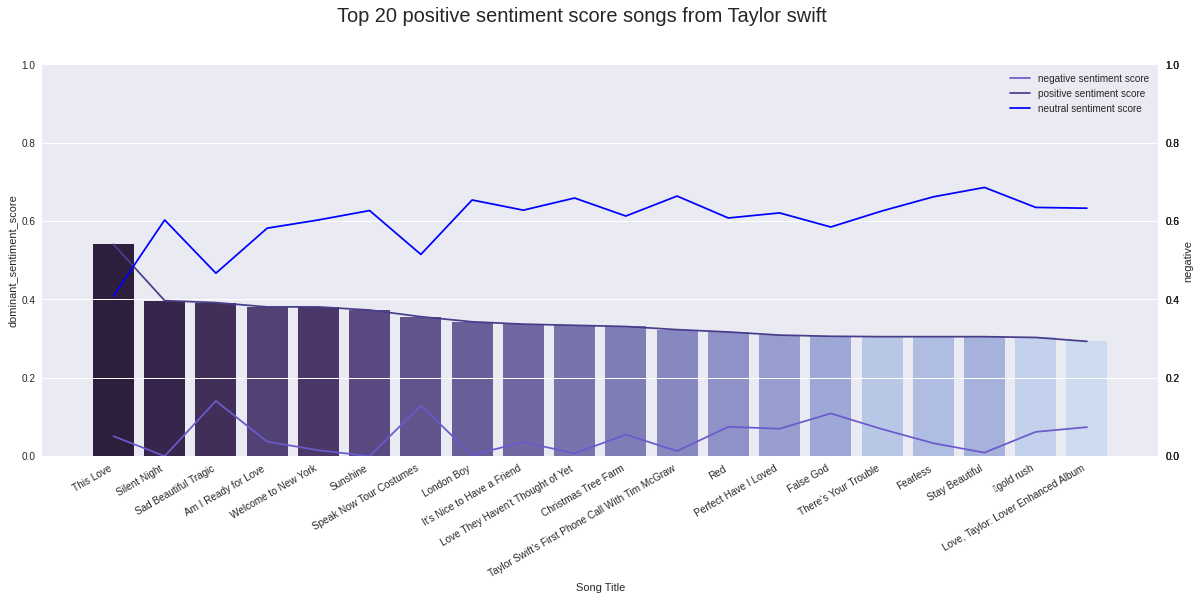

In [74]:
# define the canvas and axes
fig, ax = plt.subplots(figsize=(20,8), sharex=True)

# barplot example
bar = sns.barplot(ax=ax,
            data=df_pos,
            x="Title",
            y="dominant_sentiment_score",
            linewidth=10
)

# set bar color accoridng to their heights
bar_color(bar, df_pos.shape[0])
    
ax.set_xlabel("Song Title") # set name of x-axis
ax.set_ylim(ymax=1, ymin=0) # set ylim range to increase variances visually.

# get the twin y-axis
ax_twin1 = ax.twinx()
ax_twin2 = ax.twinx()
ax_twin3 = ax.twinx()
# implement your lineplot here 
ax_twin1.set_ylim(ymax=1, ymin=0)
ax_twin1 = sns.lineplot(data=df_pos,x="Title",y="negative",color='slateblue',label="negative sentiment score")
ax_twin2.set_ylim(ymax=1, ymin=0)
ax_twin2 = sns.lineplot(data=df_pos,x="Title",y="positive",color='darkslateblue',label="positive sentiment score")
ax_twin2.set_ylim(ymax=1, ymin=0)
ax_twin2 = sns.lineplot(data=df_pos,x="Title",y="neutral",color='blue',label="neutral sentiment score")
# define the global title
fig.suptitle("Top 20 positive sentiment score songs from Taylor swift",fontsize=20)

# format the figure
sns.despine(top=True, right=True, left=True)
fig.autofmt_xdate()

# show legend
plt.legend()

# show the plotting
plt.savefig('./figure/top_pos.png')
plt.show()

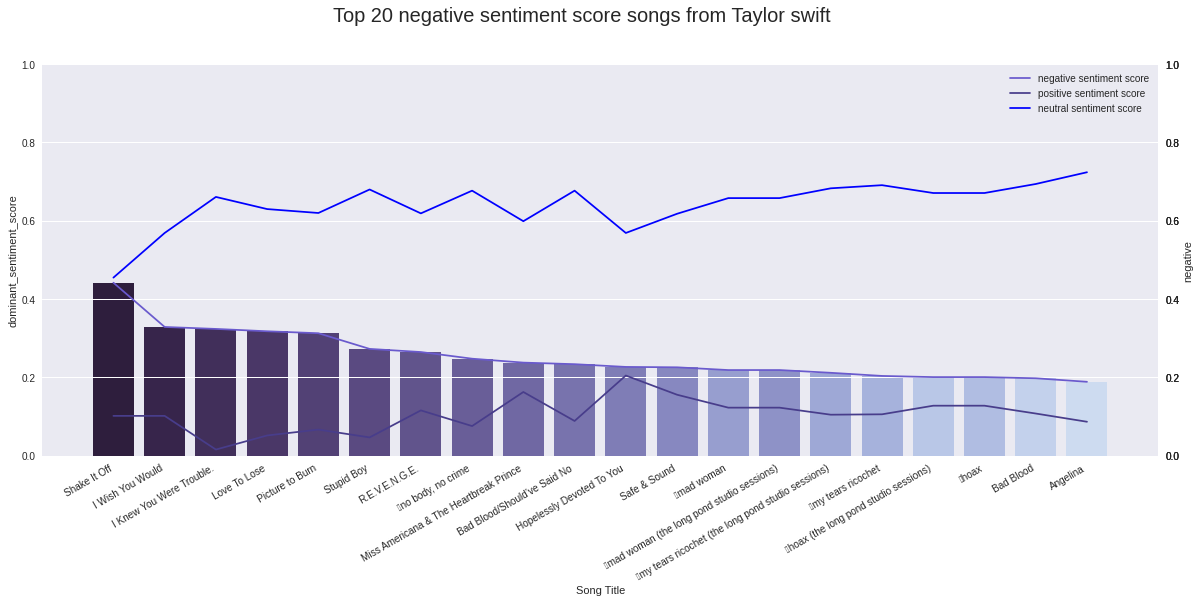

In [83]:
# define the canvas and axes
fig, ax = plt.subplots(figsize=(20,8), sharex=True)

# barplot example
bar = sns.barplot(ax=ax,
            data=df_neg,
            x="Title",
            y="dominant_sentiment_score",
            linewidth=10
)

# set bar color accoridng to their heights
bar_color(bar, df_neg.shape[0])
    
ax.set_xlabel("Song Title") # set name of x-axis
ax.set_ylim(ymax=1, ymin=0) # set ylim range to increase variances visually.

# get the twin y-axis
ax_twin1 = ax.twinx()
ax_twin2 = ax.twinx()
ax_twin3 = ax.twinx()
# implement your lineplot here 
ax_twin1.set_ylim(ymax=1, ymin=0)
ax_twin1 = sns.lineplot(data=df_neg,x="Title",y="negative",color='slateblue',label="negative sentiment score")
ax_twin2.set_ylim(ymax=1, ymin=0)
ax_twin2 = sns.lineplot(data=df_neg,x="Title",y="positive",color='darkslateblue',label="positive sentiment score")
ax_twin2.set_ylim(ymax=1, ymin=0)
ax_twin2 = sns.lineplot(data=df_neg,x="Title",y="neutral",color='blue',label="neutral sentiment score")
# define the global title
fig.suptitle("Top 20 negative sentiment score songs from Taylor swift",fontsize=20)

# format the figure
sns.despine(top=True, right=True, left=True)
fig.autofmt_xdate()

# show legend
plt.legend()

# show the plotting
plt.savefig('./figure/top_neg.png')
plt.show()

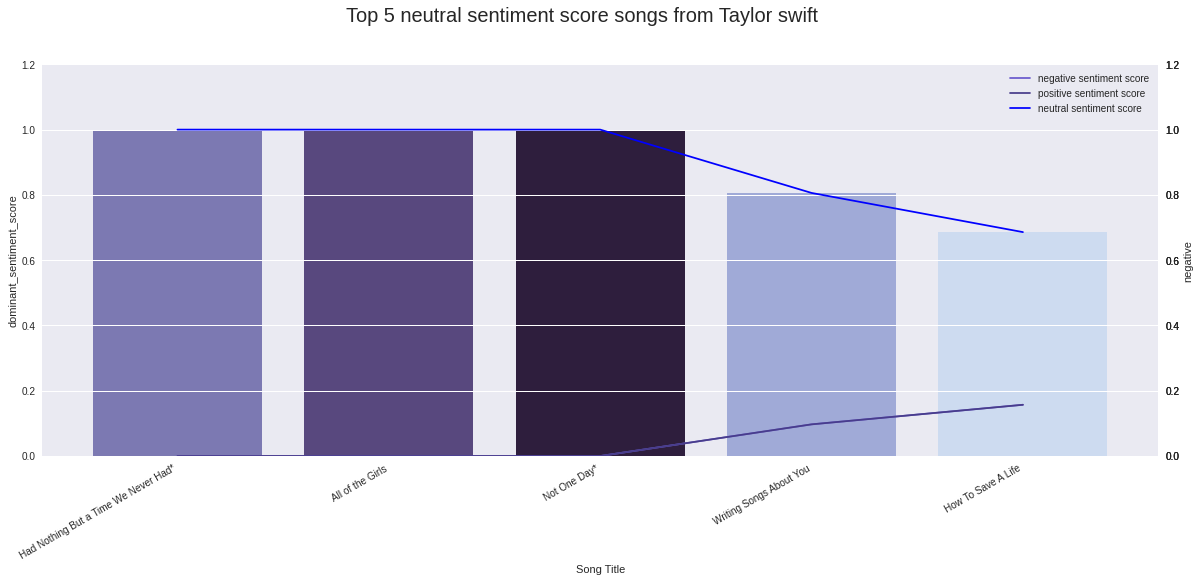

In [82]:
# define the canvas and axes
fig, ax = plt.subplots(figsize=(20,8), sharex=True)

# barplot example
bar = sns.barplot(ax=ax,
            data=df_neu,
            x="Title",
            y="dominant_sentiment_score",
            linewidth=10
)

# set bar color accoridng to their heights
bar_color(bar, df_neu.shape[0])
    
ax.set_xlabel("Song Title") # set name of x-axis
ax.set_ylim(ymax=1.2, ymin=0) # set ylim range to increase variances visually.

# get the twin y-axis
ax_twin1 = ax.twinx()
ax_twin2 = ax.twinx()
ax_twin3 = ax.twinx()
# implement your lineplot here 
ax_twin1.set_ylim(ymax=1.2, ymin=0)
ax_twin1 = sns.lineplot(data=df_neu,x="Title",y="negative",color='slateblue',label="negative sentiment score")
ax_twin2.set_ylim(ymax=1.2, ymin=0)
ax_twin2 = sns.lineplot(data=df_neu,x="Title",y="positive",color='darkslateblue',label="positive sentiment score")
ax_twin2.set_ylim(ymax=1.2, ymin=0)
ax_twin2 = sns.lineplot(data=df_neu,x="Title",y="neutral",color='blue',label="neutral sentiment score")
# define the global title
fig.suptitle("Top 5 neutral sentiment score songs from Taylor swift",fontsize=20)

# format the figure
sns.despine(top=True, right=True, left=True)
fig.autofmt_xdate()

# show legend
plt.legend()

# show the plotting
plt.savefig('./figure/top_neu.png')
plt.show()

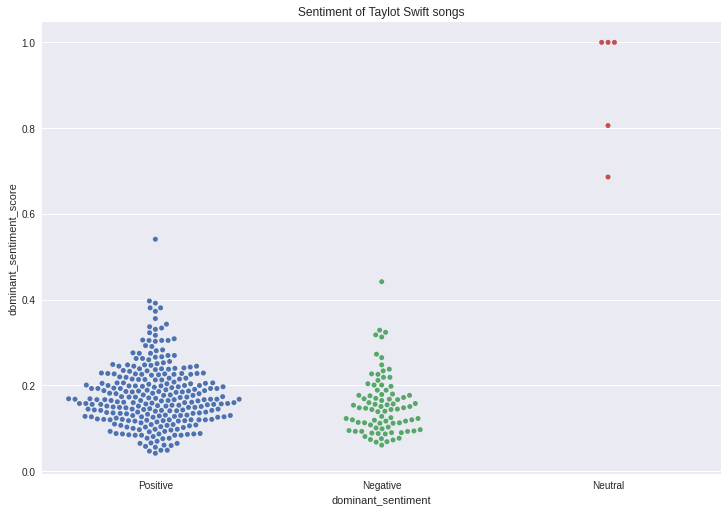

In [88]:
fig, axs = plt.subplots(figsize=(10, 7), constrained_layout=True)
plot = sns.swarmplot(data=df_sentiment, x="dominant_sentiment", y="dominant_sentiment_score",ax=axs)
axs.set_title("Sentiment of Taylot Swift songs")
plt.savefig('./figure/sentiment_scatterplot.png')
plt.show()